# Repositório no git:
 https://github.com/ana-delfino/infnet_clustering

In [1]:
import sys
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


# Parte 1 Infraestrutura 

### 1.1 Você está rodando em Python 3.9+

In [2]:
!python --version


Python 3.12.6


### 1.2 Você está usando um ambiente virtual: Virtualenv ou Anaconda

In [3]:
print(sys.prefix)

/Users/anapaula/projects/infnet_clustering/.venv


### 1.3 Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.

In [4]:
!pip freeze > requirements.txt

In [5]:
with open('requirements.txt', 'r') as file:
    content = file.read()

print(content)

appnope==0.1.4
asttokens==2.4.1
certifi==2024.8.30
charset-normalizer==3.4.0
comm==0.2.2
contourpy==1.3.1
cycler==0.12.1
debugpy==1.8.8
decorator==5.1.1
executing==2.1.0
fonttools==4.55.0
idna==3.10
ipykernel==6.29.5
ipython==8.29.0
ipywidgets==8.1.5
jedi==0.19.2
joblib==1.4.2
jupyter_client==8.6.3
jupyter_core==5.7.2
jupyterlab_widgets==3.0.13
kagglehub==0.3.4
kiwisolver==1.4.7
matplotlib==3.9.2
matplotlib-inline==0.1.7
nest-asyncio==1.6.0
numpy==2.1.3
packaging==24.2
pandas==2.2.3
parso==0.8.4
pexpect==4.9.0
pillow==11.0.0
platformdirs==4.3.6
prompt_toolkit==3.0.48
psutil==6.1.0
ptyprocess==0.7.0
pure_eval==0.2.3
Pygments==2.18.0
pyparsing==3.2.0
python-dateutil==2.9.0.post0
pytz==2024.2
pyzmq==26.2.0
requests==2.32.3
scikit-learn==1.5.2
scipy==1.14.1
seaborn==0.13.2
six==1.16.0
stack-data==0.6.3
threadpoolctl==3.5.0
tornado==6.4.1
tqdm==4.67.0
traitlets==5.14.3
typing_extensions==4.12.2
tzdata==2024.2
urllib3==2.2.3
wcwidth==0.2.13
widgetsnbextension==4.0.13



### 1.4 Tire um printscreen do ambiente que será usado rodando em sua máquina.

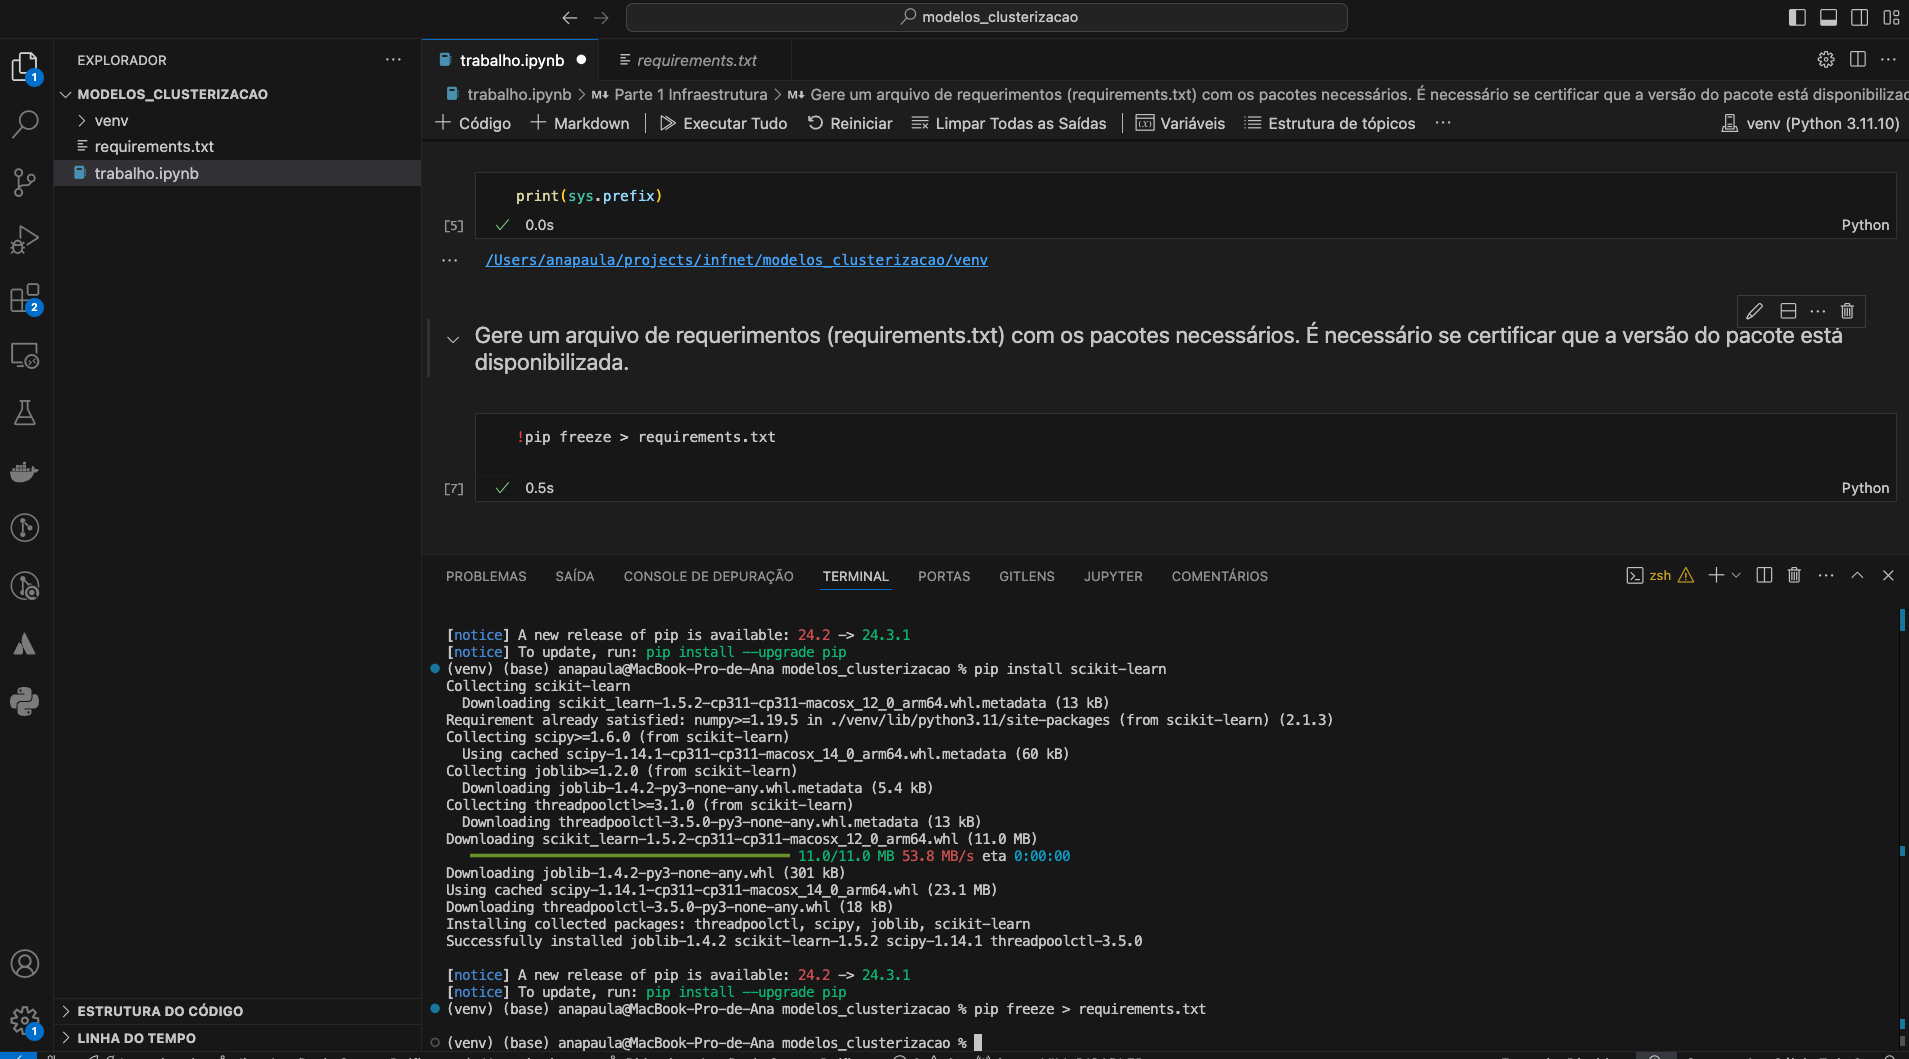

In [6]:
from PIL import Image

image = Image.open('Captura de Tela 2024-11-14 às 18.53.05.png')

image

# Parte 2 Escolha de base de dados

### 2.1  Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país. Esses dados estão disponibilizados através do link: 

In [7]:
# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

Path to dataset files: /Users/anapaula/.cache/kagglehub/datasets/rohan0301/unsupervised-learning-on-country-data/versions/2


In [8]:
df = pd.read_csv('Country-data.csv')

In [9]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [10]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## 2.2 Quantos países existem no dataset?

In [12]:
countries_count = df.country.nunique()

print(f"O dataset tem {countries_count} países distintos")

O dataset tem 167 países distintos


### 2.3  Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

`Conclusão`: Não temos dados nulos, temos alguns outliers no boxplot e os dados tem faixas muito diferentes então será necessário normarlizar os dados para clusterização

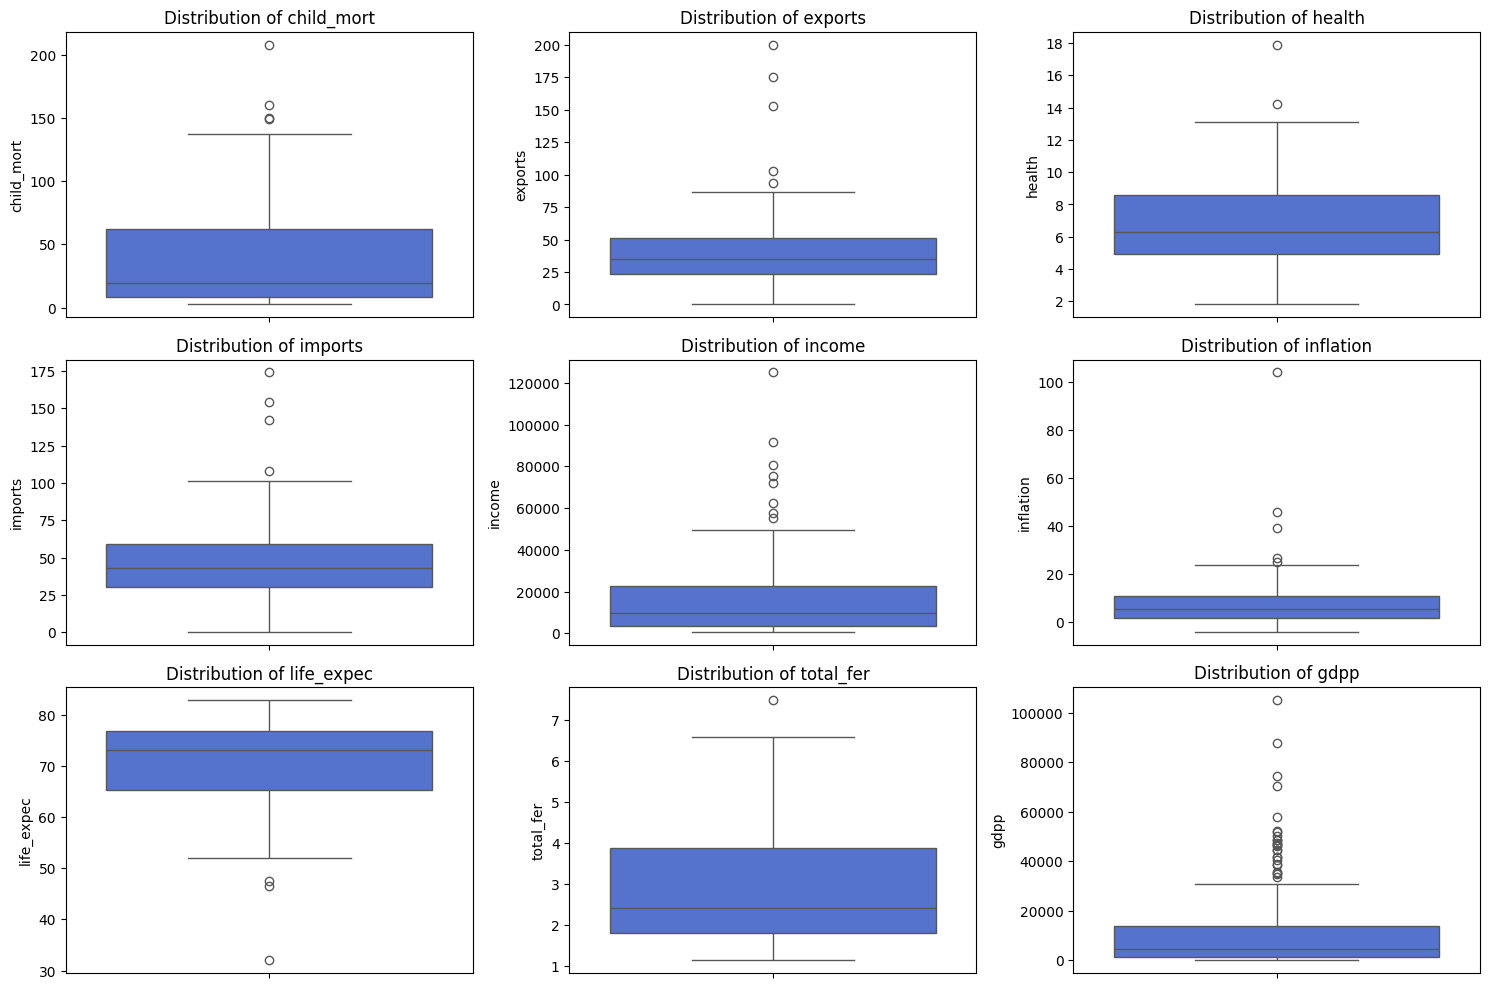

In [13]:
numeric_features = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df[feature], color='royalblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

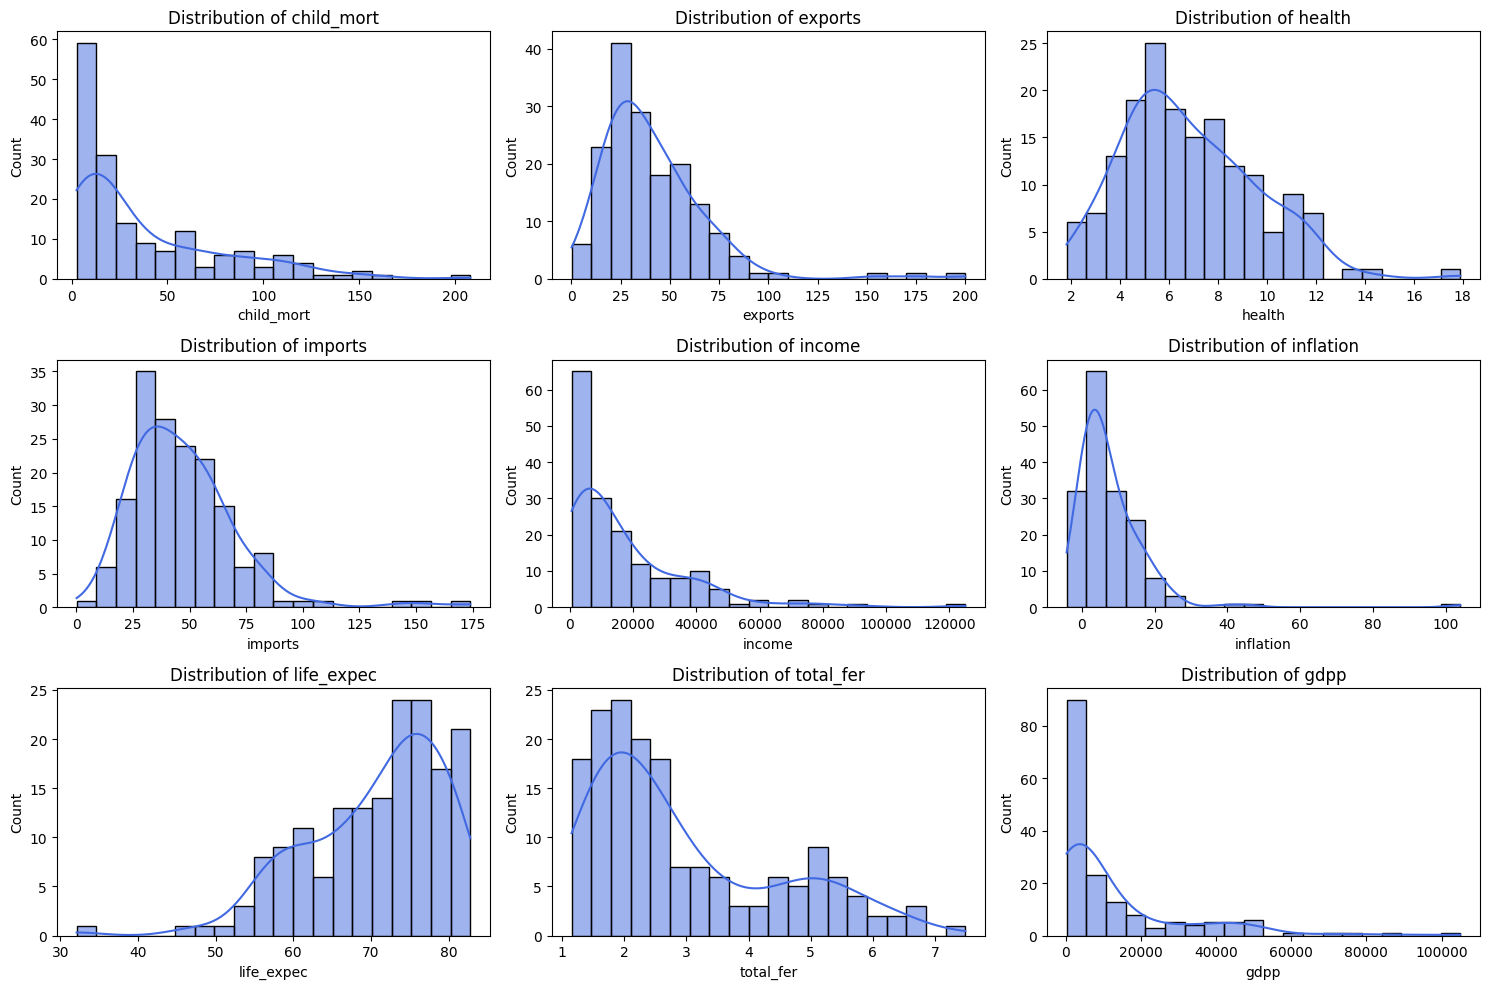

In [14]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True, bins=20, color='royalblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [15]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## 2.4 Realize o pré-processamento adequado dos dados.

aqui vamos normalizar com Minmax (escala os dados para um intervalo entre 0 e 1), visto que os dados têm uma distribuição mais dispersa.

In [16]:
scaler = MinMaxScaler()
df_normalized = df.copy() 

df_normalized[numeric_features] = scaler.fit_transform(df_normalized[numeric_features])

In [17]:
df_normalized.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,Albania,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,Algeria,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,Angola,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,Antigua and Barbuda,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


In [18]:
correlation_matrix = df_normalized[numeric_features].corr()

Pela analise de correlação poderiamos remover algumas variáveis da clusterização já que elas são altamente relacionadas. Exemplo
child_mort e total_fer 

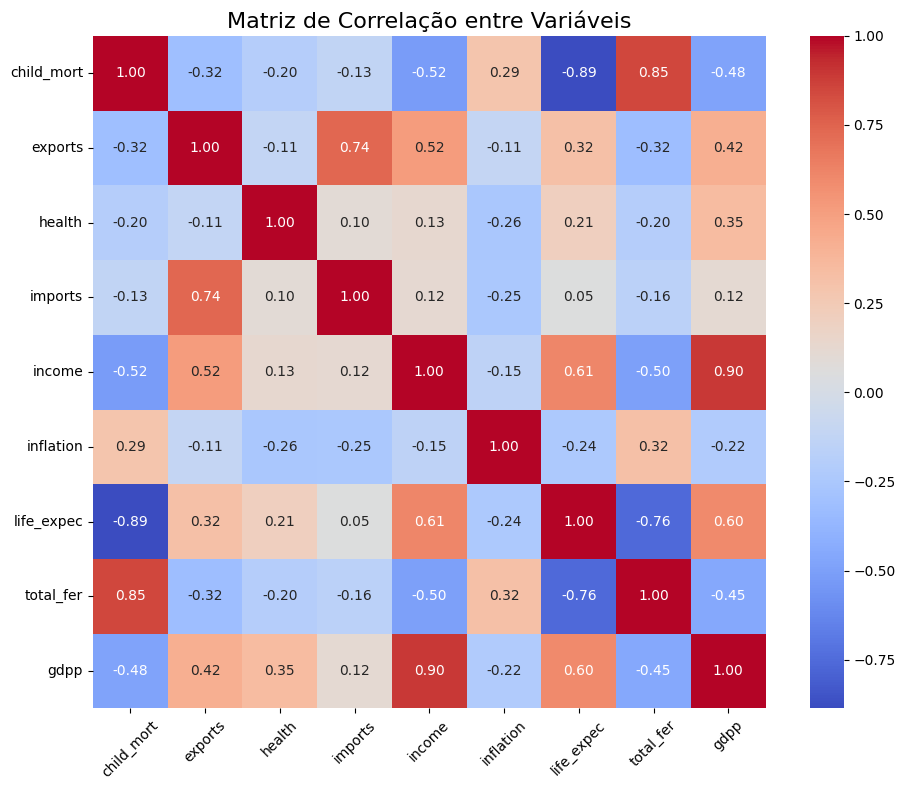

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Matriz de Correlação entre Variáveis", fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

# Parte 3 Clusterização


### 3.1 Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use:

#### 3.1.1 K-Médias


In [20]:
from sklearn.cluster import KMeans

In [21]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_normalized['KMeans_Cluster'] = kmeans.fit_predict(df_normalized[numeric_features])

In [22]:
df_normalized.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster
0,Afghanistan,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,2
1,Albania,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,0
2,Algeria,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,0
3,Angola,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,2
4,Antigua and Barbuda,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,0


#### 3.1.2 Clusterização Hierárquica

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [24]:
linked = linkage(df_normalized[numeric_features], method='ward')

In [25]:
df_normalized['Hierarchical_Cluster'] = fcluster(linked, t=3, criterion='maxclust')

In [26]:
df_normalized.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Hierarchical_Cluster
0,Afghanistan,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,2,1
1,Albania,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,0,2
2,Algeria,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,0,2
3,Angola,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,2,1
4,Antigua and Barbuda,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,0,2


### 3.2 Para os resultados, do K-Médias:
 - Interprete cada um dos clusters obtidos citando:
 - Qual a distribuição das dimensões em cada grupo
 -  O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique


Interprete cada um dos clusters obtidos citando:
#### 3.2.1 Qual a distribuição das dimensões em cada grupo

In [27]:
unscaled_data = df_normalized.copy()
unscaled_data[numeric_features] = scaler.inverse_transform(unscaled_data[numeric_features])

In [28]:
unscaled_data[unscaled_data['KMeans_Cluster']==2].describe()[numeric_features]


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,94.733333,28.842444,6.289333,42.455556,3555.400000,12.214556,59.342222,5.109111,1704.933333
std,33.001309,18.437717,2.677195,17.939691,5445.894051,15.827366,6.537566,0.942081,2826.569037
min,36.900000,2.200000,2.200000,17.200000,609.000000,0.885000,32.100000,3.150000,231.000000
25%,66.800000,16.800000,4.510000,30.000000,1390.000000,3.870000,56.800000,4.600000,547.000000
50%,90.300000,23.800000,5.300000,40.300000,1850.000000,9.200000,60.100000,5.110000,769.000000
75%,111.000000,37.000000,7.650000,49.300000,3320.000000,16.600000,62.900000,5.710000,1310.000000
max,208.000000,85.800000,13.100000,101.000000,33700.000000,104.000000,71.100000,7.490000,17100.000000


In [29]:
unscaled_data[unscaled_data['KMeans_Cluster']==1].describe()[numeric_features]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,4.897143,58.431429,8.917429,51.508571,45802.857143,2.535000,80.245714,1.741143,43117.142857
std,2.130795,42.501749,3.154562,37.381754,21141.490928,4.053256,1.696596,0.371814,18891.773587
min,2.600000,12.400000,1.810000,13.600000,25200.000000,-3.220000,75.500000,1.150000,16600.000000
25%,3.500000,29.500000,7.825000,28.300000,32400.000000,0.418000,79.650000,1.435000,30750.000000
50%,4.200000,50.200000,9.480000,37.400000,40400.000000,1.160000,80.400000,1.790000,41800.000000
75%,5.400000,67.050000,10.850000,62.900000,47550.000000,3.420000,81.400000,1.940000,48550.000000
max,10.800000,200.000000,17.900000,174.000000,125000.000000,16.700000,82.800000,3.030000,105000.000000


In [30]:
unscaled_data[unscaled_data['KMeans_Cluster']==0].describe()[numeric_features]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,22.490805,40.484931,6.242414,47.326045,12644.482759,7.599839,72.457471,2.315632,6657.379310
std,14.388486,19.002087,2.165041,19.875540,8609.106693,7.713901,4.688993,0.688280,5163.557313
min,4.500000,0.109000,1.970000,0.065900,1780.000000,-4.210000,54.300000,1.250000,592.000000
25%,11.600000,26.900000,4.885000,31.900000,6705.000000,2.485000,69.900000,1.765000,2970.000000
50%,18.600000,37.600000,5.980000,48.700000,10500.000000,5.990000,73.500000,2.240000,5020.000000
75%,29.150000,51.400000,7.525000,60.250000,16800.000000,9.905000,76.050000,2.665000,9070.000000
max,64.400000,93.800000,14.200000,108.000000,45400.000000,45.900000,80.400000,4.340000,28000.000000


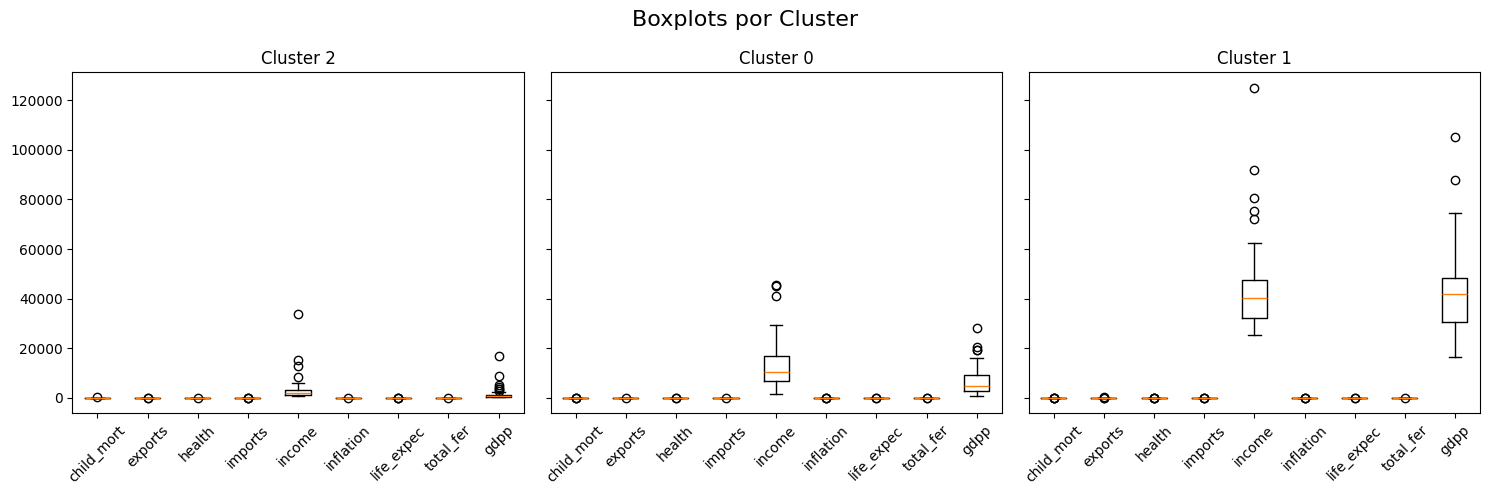

In [31]:
clusters = unscaled_data['KMeans_Cluster'].unique()

fig, axes = plt.subplots(1, len(clusters), figsize=(15, 5), sharey=True)

for i, cluster in enumerate(clusters):
    cluster_data = unscaled_data[unscaled_data['KMeans_Cluster']==cluster] 
    axes[i].boxplot(cluster_data[numeric_features], tick_labels=numeric_features )
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].tick_params(axis='x', rotation=45)

fig.suptitle('Boxplots por Cluster', fontsize=16)
plt.tight_layout()
plt.show()

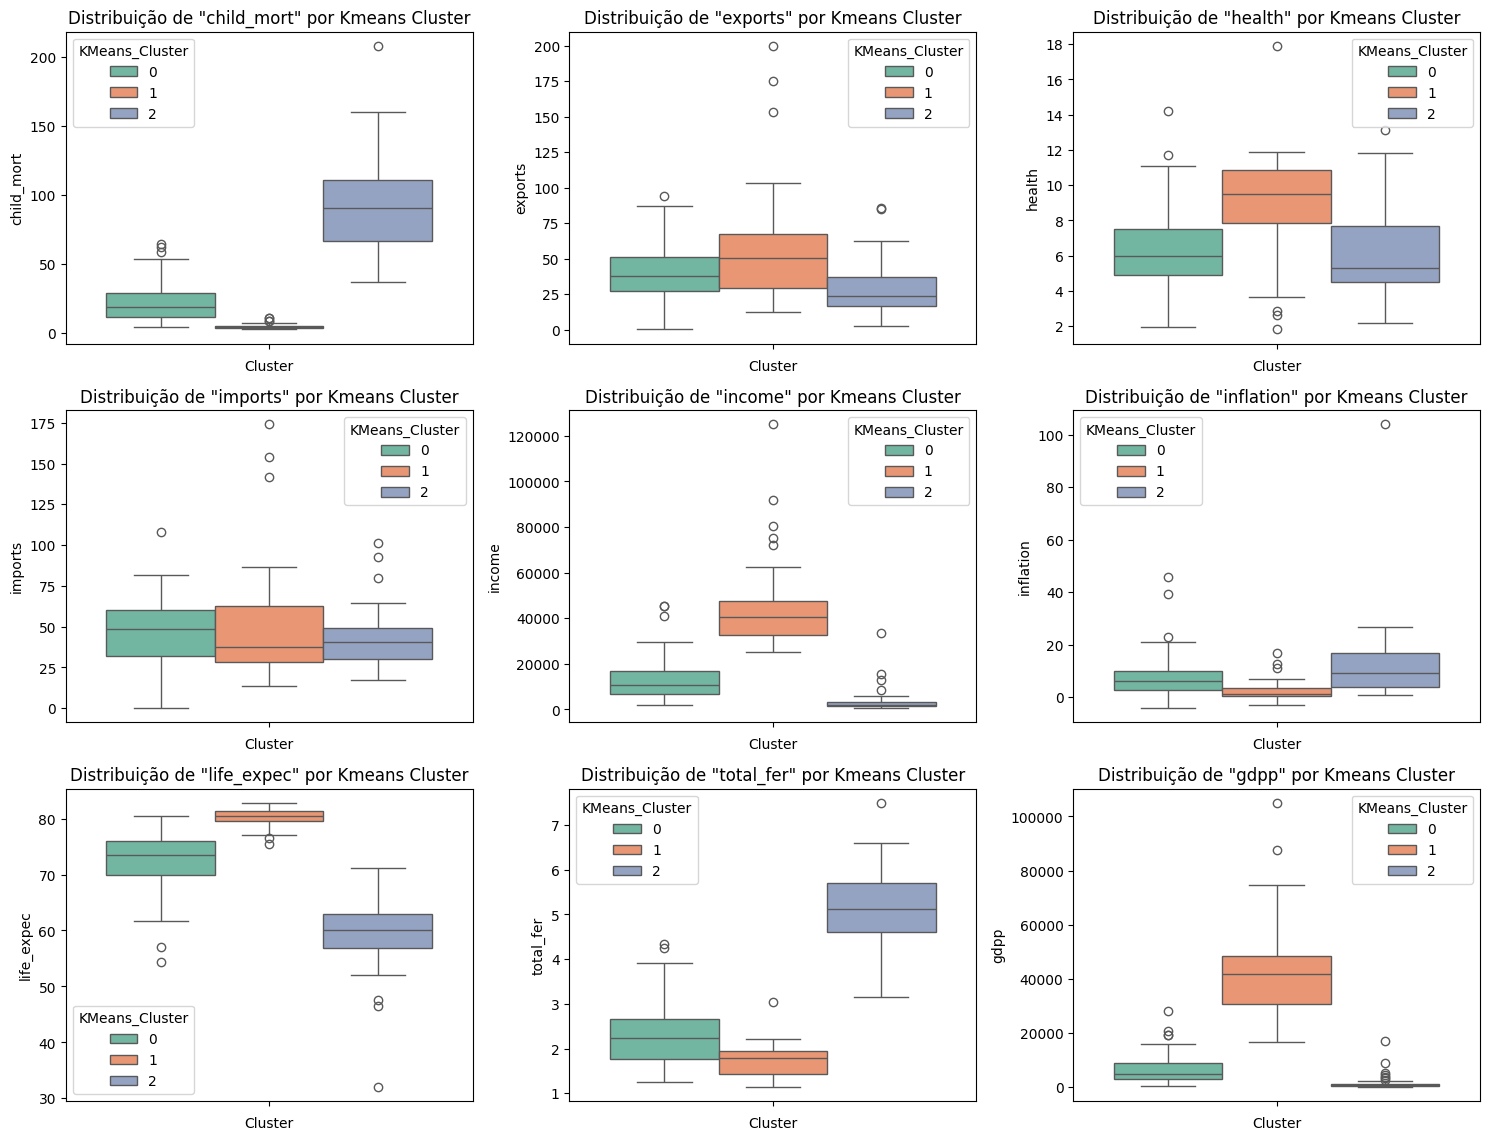

In [32]:
fig, axes = plt.subplots(4, 3, figsize=(15, 5 * 3))

axes = axes.flatten()

for i, coluna in enumerate(numeric_features):
    sns.boxplot(hue='KMeans_Cluster', y=coluna, data=unscaled_data, ax=axes[i], palette="Set2")
    axes[i].set_title(f'Distribuição de "{coluna}" por Kmeans Cluster', fontsize=12)
    axes[i].set_xlabel('Cluster', fontsize=10)
    axes[i].set_ylabel(coluna, fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- `Cluster 2`: países com faixa de life_expec, GDPP e income mais `baixa`, e faixas de total_fer, inflation e child_mort mais `alta` entre os grupos
- `cluster 1`: países com faixa de health, life_expec, GDPP e income mais `alta`, e faixa de total_fer,  inflation e child_mort mais `baixa` entre os grupos
- `cluster 0`: países com faixa de life_expec, GDPP e income `intermediária`, faixa de total_fer,  inflation e child_mort `intermediária` entre os grupos

Além disso, temos que o cluster 0 é o maior de todos com 87 países, o cluster 2 tem 45 países, já o cluster 1 tem 35 países.

Interprete cada um dos clusters obtidos citando:

##### 3.2.2 O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique

Para cada um dos clusters o país que melhor representa o agrupamento é o país mais próximo ao centróide, pois ele tem as características que são típicas do cluster, possui os valores das variáveis mais próximos da média do grupo.

- `Cluster 0`:Representado pelo Suriname
- `Cluster 1`:Representado pelo iceland 
- `Cluster 2`: Representado pela Guinea

In [33]:
centroids = kmeans.cluster_centers_

In [34]:
centroids

array([[0.09683936, 0.20198974, 0.27547631, 0.27171294, 0.09675525,
        0.10913815, 0.79600535, 0.18385366, 0.06133856],
       [0.01118375, 0.29177116, 0.44172956, 0.29575955, 0.36332096,
        0.0623325 , 0.94961961, 0.0932402 , 0.40934   ],
       [0.44855566, 0.14374556, 0.27839238, 0.24371101, 0.0236866 ,
        0.15178408, 0.53732194, 0.62446547, 0.01406841]])

In [35]:
df_normalized['Distance_to_Centroid'] = df_normalized.apply(
    lambda row: np.linalg.norm(row[numeric_features] - centroids[row['KMeans_Cluster']]),
    axis=1
)

representative_countries = df_normalized.loc[
    df_normalized.groupby('KMeans_Cluster')['Distance_to_Centroid'].idxmin(), :
]

In [36]:
representative_countries[['country', 'KMeans_Cluster', 'Distance_to_Centroid']]

,country,KMeans_Cluster,Distance_to_Centroid
143,Suriname,0,0.108856
68,Iceland,1,0.119836
63,Guinea,2,0.125750


In [37]:
df_normalized.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Hierarchical_Cluster,Distance_to_Centroid
0,Afghanistan,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,2,1,0.182870
1,Albania,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,0,2,0.154312
2,Algeria,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,0,2,0.216357
3,Angola,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,2,1,0.353396
4,Antigua and Barbuda,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,0,2,0.160250


### 3.3 Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados


No dendograma abaixo é possível ver os nos ramos a formação dos clusters, cada linhas horinzontal conecta dois clusters que são agrupados em um único cluster. A altura representa a distancia entre os clusters que estão sendo agrupados, quanto mais alto oponto de junção mais diferentes são os elementos do grupo.

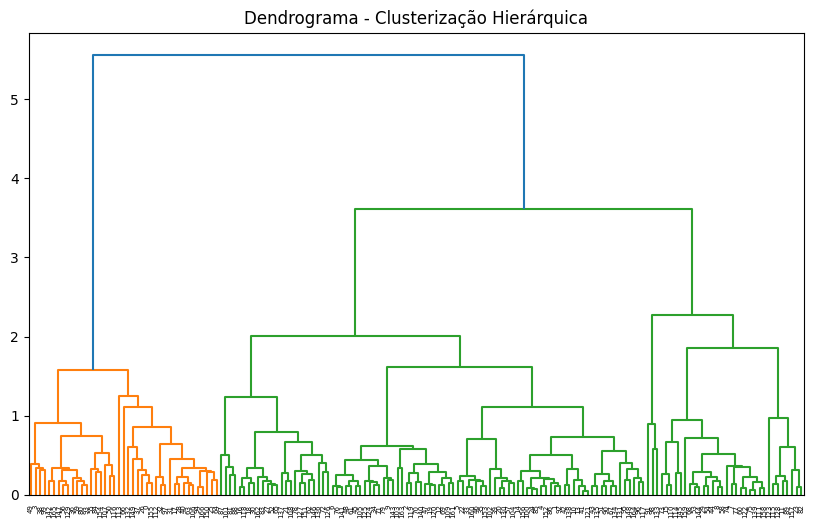

In [38]:
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title('Dendrograma - Clusterização Hierárquica')
plt.show()

### 3.4 Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

- `Cluster 2` do Kmeans é parecido com o `Cluster 1` do hierarchical visto que apresentam as mesmas características: países com faixa de life_expec, GDPP e income mais `baixa`, e faixas de total_fer, inflation e child_mort mais `alta` entre os grupos
- `cluster 1` do Kmeans é parecido com o `Cluster 3` do hierarchical visto que apresentam as mesmas características: países com faixa de health, life_expec, GDPP e income mais `alta`, e faixa de total_fer,  inflation e child_mort mais `baixa` entre os grupos
- `cluster 0` do Kmeans é parecido com o `Cluster 2` do hierarchical visto que apresentam as mesmas características: países com faixa de life_expec, GDPP e income `intermediária`, faixa de total_fer,  inflation e child_mort `intermediária` entre os grupos

A semelhança é reafirmanda pelo fato de todos os países que são centróides no kmeans estarem no cluster correspondente na clusterização hierarqueica. Apesar disso, podemos ver que a quantidade de países em cada cluster é diferente e que alguns países como Iraq, Liberia que no kmeans está no grupo 1 na clusterização hierarquica está no cluster 2.

In [39]:
unscaled_data[unscaled_data['country']=='Guinea'][['KMeans_Cluster','Hierarchical_Cluster']]

,KMeans_Cluster,Hierarchical_Cluster
63,2,1


In [40]:
unscaled_data[unscaled_data['country']=='Suriname'][['KMeans_Cluster','Hierarchical_Cluster']]

,KMeans_Cluster,Hierarchical_Cluster
143,0,2


In [41]:
unscaled_data[unscaled_data['country']=='Iceland'][['KMeans_Cluster','Hierarchical_Cluster']]

,KMeans_Cluster,Hierarchical_Cluster
68,1,3


In [42]:
#Aqui o KMeans_Cluster_ajust representa o cluster no kmeans com a mesma nomenclatura da clusterização hierarquica
unscaled_data['KMeans_Cluster_ajust'] = unscaled_data['KMeans_Cluster'].replace({1:3}).replace({1:3}).replace({2:1}).replace({0:2})

In [43]:
unscaled_data.groupby('Hierarchical_Cluster').count().reset_index()[['Hierarchical_Cluster','country']]

,Hierarchical_Cluster,country
0,1,41
1,2,92
2,3,34


In [44]:
unscaled_data.groupby('KMeans_Cluster_ajust').count().reset_index()[['KMeans_Cluster_ajust','country']]

,KMeans_Cluster_ajust,country
0,1,45
1,2,87
2,3,35


In [45]:
kmeans_cluster1 = unscaled_data[unscaled_data['KMeans_Cluster_ajust']==1]['country'].unique().tolist()
kmeans_cluster2 = unscaled_data[unscaled_data['KMeans_Cluster_ajust']==2]['country'].unique().tolist()
kmeans_cluster3 = unscaled_data[unscaled_data['KMeans_Cluster_ajust']==3]['country'].unique().tolist()

hierar_cluster1 = unscaled_data[unscaled_data['Hierarchical_Cluster']==1]['country'].unique().tolist()
hierar_cluster2 = unscaled_data[unscaled_data['Hierarchical_Cluster']==2]['country'].unique().tolist()
hierar_cluster3 = unscaled_data[unscaled_data['Hierarchical_Cluster']==3]['country'].unique().tolist()

In [46]:
difference_cluster1_kh= list(set(kmeans_cluster1) - set(hierar_cluster1))
difference_cluster1_h_k = list( set(hierar_cluster1)- set(kmeans_cluster1))


print(f"""Países que estão no cluster 1 do kmeans, mas não estão no cluster 1 do hierarchical: 
      {difference_cluster1_kh}""")
print(f"""Países que estão no cluster 1 do hierarchical, mas não estão no cluster 1 do kmeans: 
      {difference_cluster1_h_k}""")

Países que estão no cluster 1 do kmeans, mas não estão no cluster 1 do hierarchical: 
      ['Rwanda', 'Kiribati', 'Namibia', 'Lesotho', 'Iraq', 'Liberia']
Países que estão no cluster 1 do hierarchical, mas não estão no cluster 1 do kmeans: 
      ['Turkmenistan', 'Myanmar']


In [47]:
difference_cluster2_kh= list(set(kmeans_cluster2) - set(hierar_cluster2))
difference_cluster2_h_k = list( set(hierar_cluster2)- set(kmeans_cluster2))


print(f"""Países que estão no cluster 2 do kmeans, mas não estão no cluster 2 do hierarchical: 
      {difference_cluster2_kh}""")
print(f"""Países que estão no cluster 2 do hierarchical, mas não estão no cluster 2 do kmeans: 
      {difference_cluster2_h_k}""")

Países que estão no cluster 2 do kmeans, mas não estão no cluster 2 do hierarchical: 
      ['Turkmenistan', 'Libya', 'Saudi Arabia', 'Bahrain', 'Myanmar', 'Oman']
Países que estão no cluster 2 do hierarchical, mas não estão no cluster 2 do kmeans: 
      ['Rwanda', 'Slovak Republic', 'Kiribati', 'Namibia', 'South Korea', 'Cyprus', 'Lesotho', 'Iraq', 'Slovenia', 'Czech Republic', 'Liberia']


In [48]:
difference_cluster3_kh= list(set(kmeans_cluster3) - set(hierar_cluster3))
difference_cluster3_h_k = list( set(hierar_cluster3)- set(kmeans_cluster3))


print(f"""Paises que estão no clsuter 3 do kmeans, mas não estão no cluster 3 do hierarchical: 
      {difference_cluster3_kh}""")
print(f"""Paises que estão no clsuter 3 do hierarchical, mas não estão no cluster 3 do kmeans: 
      {difference_cluster3_h_k}""")

Paises que estão no clsuter 3 do kmeans, mas não estão no cluster 3 do hierarchical: 
      ['Slovak Republic', 'South Korea', 'Cyprus', 'Slovenia', 'Czech Republic']
Paises que estão no clsuter 3 do hierarchical, mas não estão no cluster 3 do kmeans: 
      ['Libya', 'Saudi Arabia', 'Oman', 'Bahrain']


In [49]:
unscaled_data.groupby(['Hierarchical_Cluster','KMeans_Cluster_ajust']).count().reset_index()[['Hierarchical_Cluster','KMeans_Cluster_ajust','country']]

,Hierarchical_Cluster,KMeans_Cluster_ajust,country
0,1,1,39
1,1,2,2
2,2,1,6
3,2,2,81
4,2,3,5
5,3,2,4
6,3,3,30


In [50]:
unscaled_data[['KMeans_Cluster', 'Hierarchical_Cluster','country']]

,KMeans_Cluster,Hierarchical_Cluster,country
0,2,1,Afghanistan
1,0,2,Albania
2,0,2,Algeria
3,2,1,Angola
4,0,2,Antigua and Barbuda
...,...,...,...
162,0,2,Vanuatu
163,0,2,Venezuela
164,0,2,Vietnam
165,2,1,Yemen


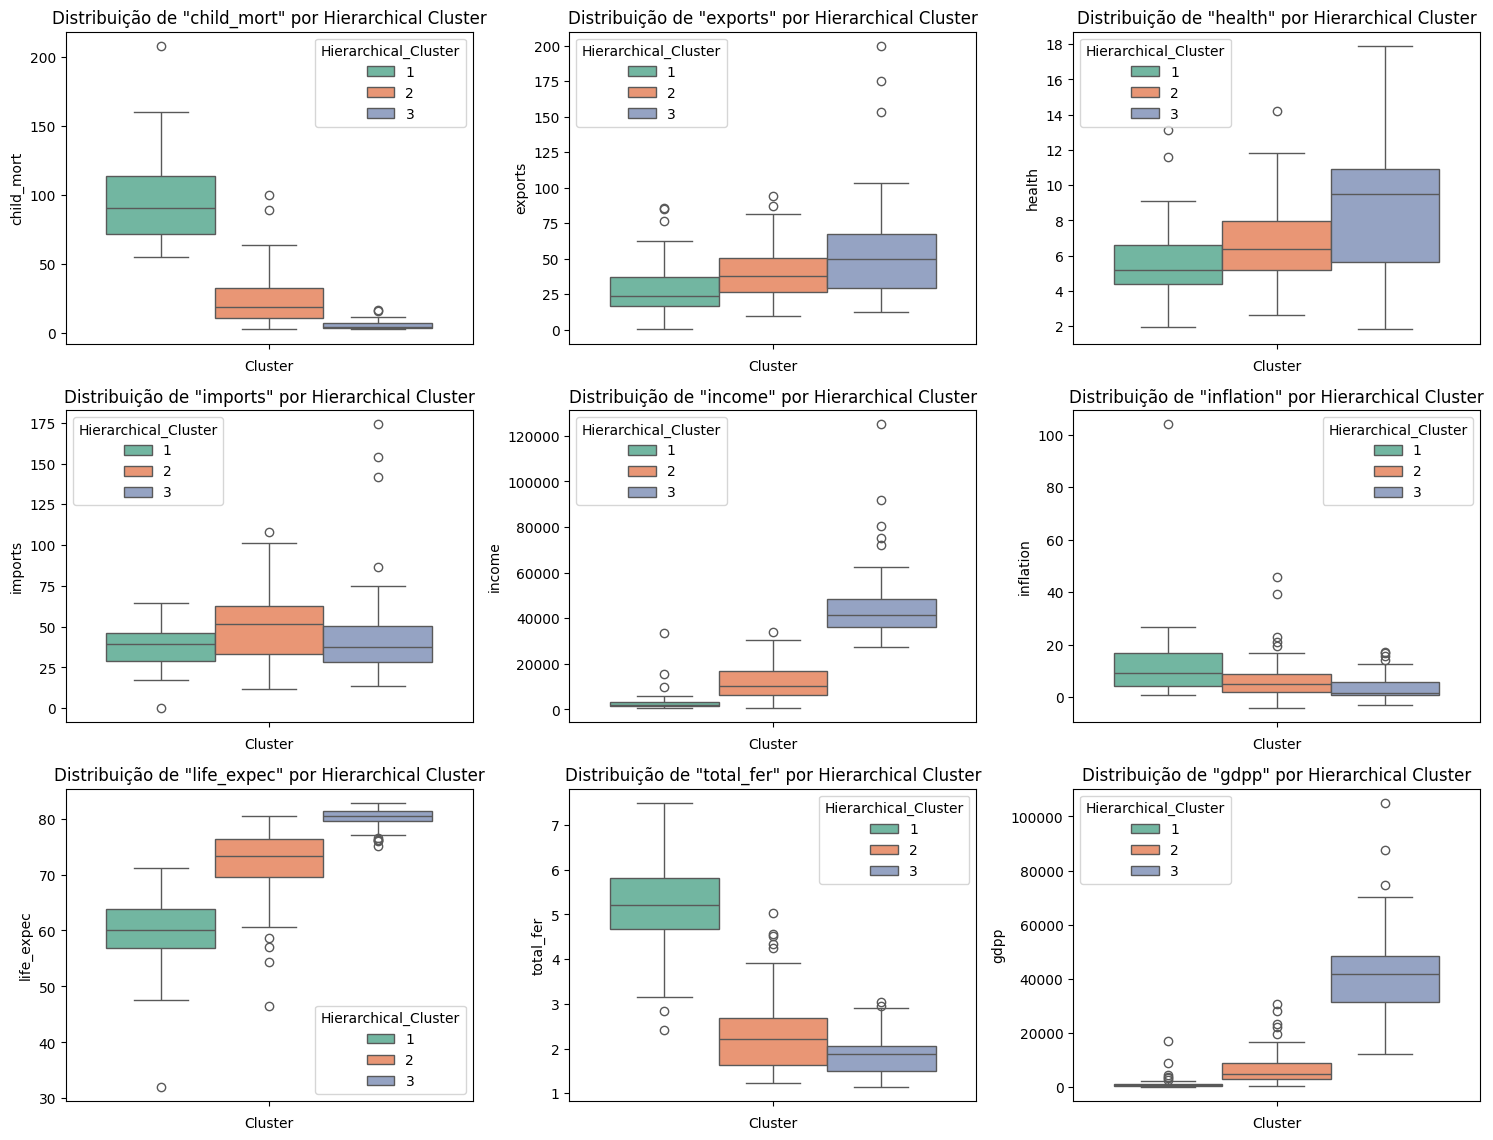

In [51]:
fig, axes = plt.subplots(4, 3, figsize=(15, 5 * 3))

axes = axes.flatten()

for i, coluna in enumerate(numeric_features):
    sns.boxplot(hue='Hierarchical_Cluster', y=coluna, data=unscaled_data, ax=axes[i], palette="Set2")
    axes[i].set_title(f'Distribuição de "{coluna}" por Hierarchical Cluster', fontsize=12)
    axes[i].set_xlabel('Cluster', fontsize=10)
    axes[i].set_ylabel(coluna, fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

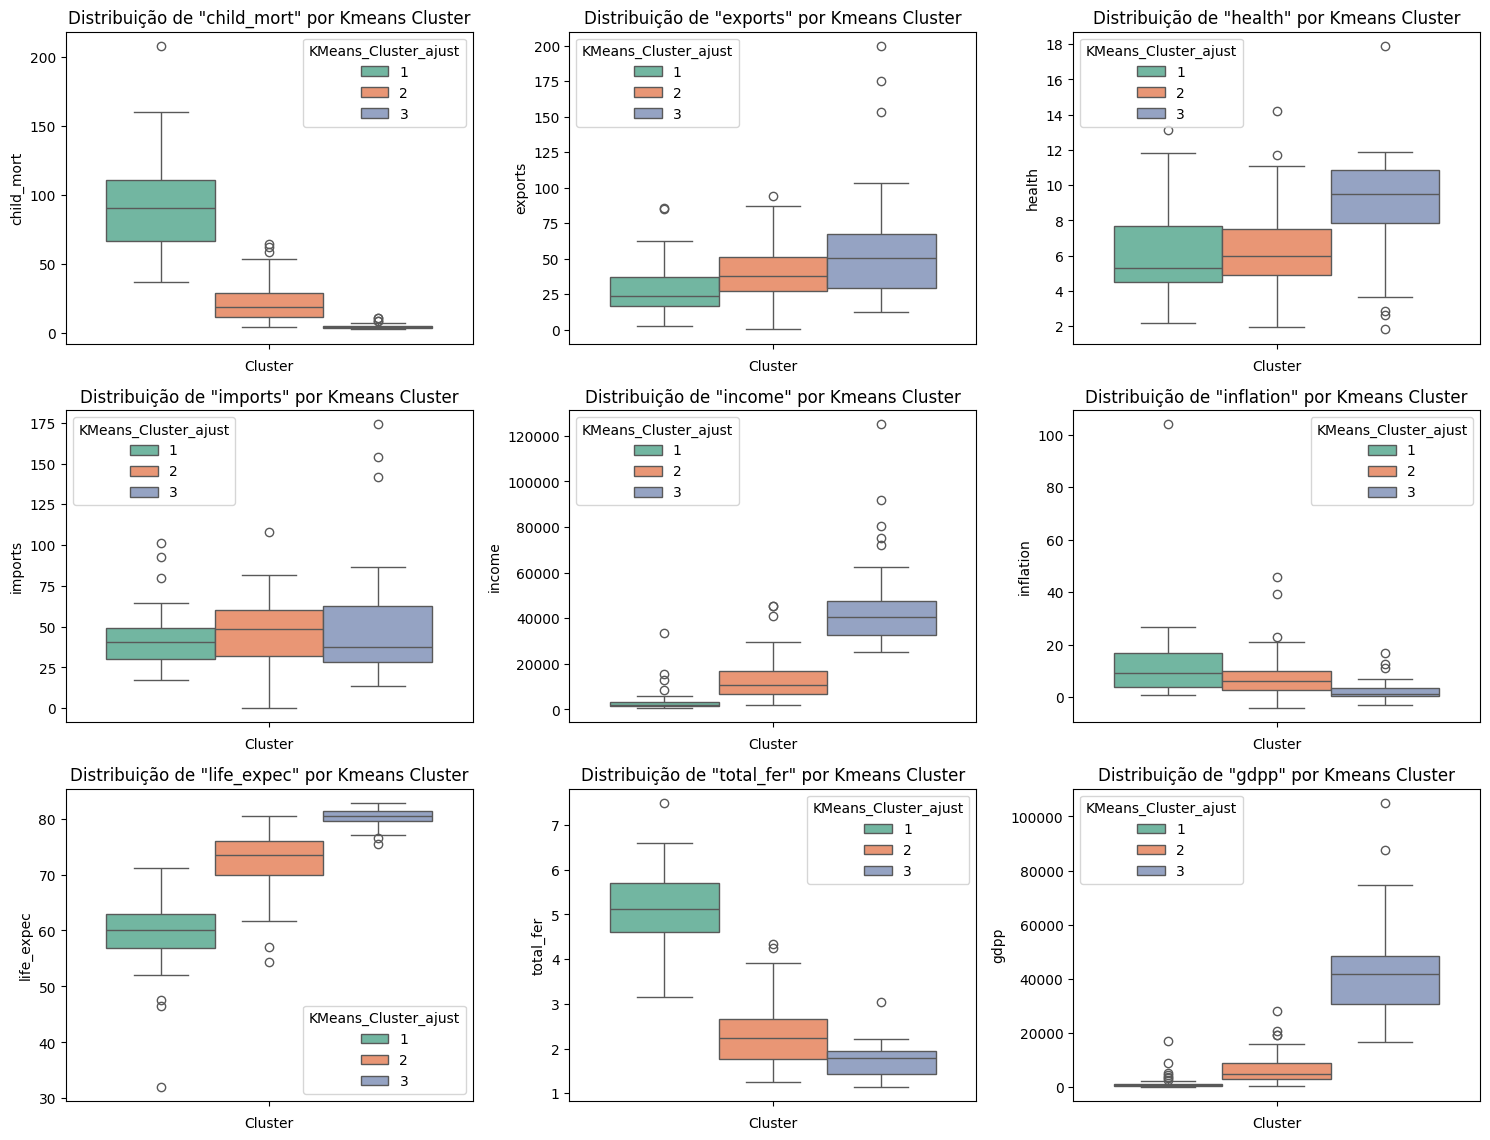

In [52]:
fig, axes = plt.subplots(4, 3, figsize=(15, 5 * 3))

axes = axes.flatten()

for i, coluna in enumerate(numeric_features):
    sns.boxplot(hue='KMeans_Cluster_ajust', y=coluna, data=unscaled_data, ax=axes[i], palette="Set2")
    axes[i].set_title(f'Distribuição de "{coluna}" por Kmeans Cluster', fontsize=12)
    axes[i].set_xlabel('Cluster', fontsize=10)
    axes[i].set_ylabel(coluna, fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Parte 4 Escolha de algoritmos


### 4.1 Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.

Dado um conjunto de dados com N elementos, uma quantidade k e uma distância d.

`Step 1`: Inicialização dos centródes
- Escolher um número de k centróides (clusters), que pode ser de forma aleatória ou não.

`Step 2`: Atribuição dos pontos aos clusters
- Associar cada ponto do conjunto de dados ao centróide mais próximo segundo a distância d, formando assim k grupos.
- O centróide vai ser o centro da massa de dados, minimizando a soma do erro quadratico sobre todos os k grupos.

`Step 3`: Atualização dos centróide
- Para cada cluster, o centróide é atualizado para ser o ponto médio de todos os pontos atribuidos a ele.

`Step 4`: Verificar a convergência
- Verificar se o valor atualizado do centoíde mudou significamente em relação a iteração anterior
- Se a mudança nos centróides não for significativa ou o número de iterações máximo seja atingido o algoritmo para. Caso contrário os steps 2 e 3 são repetidos até a convergência

O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). 
Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. 

### 4.2 O Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.
Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.


Dado um conjunto de dados com N elementos, uma quantidade k e uma distância d. o k-medoíde é parecido com o k-means, a difrença é no primeiro o centróide é um dos pontos do conjunto de dados e não a média, o que torna o algoritmo mais robusto a outliers.

`Step 1`: Inicialização dos Medoides
- Escolher um número k de medoides (clusters), que pode ser de forma aleatória ou com métodos específicos para seleção inicial.

`Step 2`: Atribuição dos Pontos aos Clusters
- Associar cada ponto do conjunto de dados ao medoide mais próximo, segundo a distância d, formando assim k grupos.
- O medoide é o ponto real do conjunto de dados que minimiza a soma das distâncias absolutas entre ele e todos os outros pontos no cluster.

`Step 3`: Atualização dos Medoides
- Para cada cluster, o medoide é atualizado para ser o ponto que minimiza a soma das distâncias absolutas (ou outras métricas de dissimilaridade) em relação aos demais pontos do cluster. Esse ponto central é um ponto real do conjunto de dados e não uma média, como no K-Médias.

`Step 4`: Verificar a Convergência
- Verificar se o valor atualizado do medoide mudou significativamente em relação à iteração anterior.
- Se a mudança nos medoides for insignificante ou se o número máximo de iterações for atingido, o algoritmo para. Caso contrário, os passos 2 e 3 são repetidos até a convergência.

### 4.3  O algoritmo de K-médias é sensível a outliers nos dados. Explique.

Conforme explicado na questão 4.1 o algortimo k-means utiliza a média apra calcular os centróides de cada cluster. A média é uma medida estatística que sofre grande influência de valores extremos, levando a distorção a posição do centróide levendo a representação incorreta dos clusters e associação incorreta dos pontos aos clusters. Além disso, como o k-means busca minimizar a soma dos erros quadráticos entre os pontos e os centróides, com outliers essa soma pode aumentar e isso leva o algoritmo a focar na mininzação do erro causado pelo outlier, dificultando a convergência para uma solução adequada.

### 4.4 Por que o algoritmo de DBScan é mais robusto à presença de outliers?

DBSCAN é menos influenciados por outliers, já que não dependem tanto da média para definir clusters, já que se baseia na densidade dos pontos para identificação dos clusters. Além disso, esse metodo não força cada ponto a pertencer a um cluster, já que ele trata pontos que não encaixam como um ruído isoloda não sendo incluido em nenhum cluster.